<img src="https://pbs.twimg.com/media/E0m6c9FX0AIX0p1.png" style="height:200px" align="left"/> <br><br><br><br>

<br/>
<br/>
<br/>
<br/>
<br/>

### **Exploring GEOROC 2.0:** <br/> Data Access, Formatting, and Visualization for Geochemical Analysis

***

<div style="text-align: justify; max-width: 850px">
The GEOROC Database (Geochemistry of Rocks of the Oceans and Continents) is a comprehensive collection of published analyses of igneous and metamorphic rocks and minerals. It contains major and trace element concentrations, radiogenic and nonradiogenic isotope ratios as well as analytical ages for whole rocks, glasses, minerals and inclusions. Metadata include geospatial and other sample information, analytical details and references.

The GEOROC Database was established at the Max Planck Institute for Chemistry in Mainz (Germany). In 2021, the database was moved to Göttingen University, where it continues to be curated as part of the DIGIS project of the Department of Geochemistry and Isotope Geology at the Geoscience Centre (GZG) and the University and State Library (SUB). Development for GEOROC 2.0 includes a new data model for greater interoperability, options to contribute data, and improved access to the database.

As part of the DIGIS project, a new API interface has been created for the GEOROC database, allowing easy access to its contents with simple programming skills. Users can now query the database and retrieve data using the new API, making it more accessible and useful for researchers and other interested parties. This notebook demonstrates the basic capabilities of GEOROC data access <br/> via the new DIGIS API. 

For feedback, questions and further information contact [DIGIS-Info](mailto:digis-info@uni-goettingen.de) directly.

This notebook demonstrates the basic capabilities of common data cleaning methods in geoscience.
</div>

***

June 2023, Marthe Klöcking, Timm M. Wirtz

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" style="height:50px" align="left"/> <br><br>

https://creativecommons.org/licenses/by-nc-sa/4.0/

***

### <a name="table"></a>Table of contents

* [Import modules](#import)
* [Store your API key](#store)
        * [Hint](#hint)
* [Select the data that should be in the dataset](#select)
        * [Hint](#hint2)
* [Check if there is a connection to the API](#check)
* [Select the filters to search for desired data](#filters)
* [Extract the necessary SampleID's](#extract1)
* [The raw dataset](#rawdata)
* [Extract all the data using the SampleID's](#extract2)
* [Sort columns](#sort-columns)
* [Structure and pivot the dataset](#strucdata)
* [Plot the data on a map](#plotmap)
* [Plot FeO* against S](#plotfeotS)
* [Plot the data in the TAS diagram](#plottas)
* [Excursion - EarthChem API](#excursion)
* [References](#refs)
* [QR code for accessing this Jupyter notebook](#qrcode)
        * [Hint](#hint3)

***

#### <a name="import"></a>Import modules

<div style="text-align: justify; max-width: 850px">

**requests**: This module allows you to send HTTP requests and handle responses in Python. It is commonly used for making API calls and retrieving data from web servers.

**json**: The JSON module provides functions to work with JSON data. It allows you to serialize Python objects into JSON strings and deserialize JSON strings into Python objects.

**pandas**: The pandas library is a powerful tool for data manipulation and analysis. It provides data structures and functions for efficiently working with structured data, such as tables or spreadsheets.

**geopandas**: Geopandas is an extension of the pandas library that adds support for geospatial data analysis. It provides data structures and functions for working with geographic data, such as maps, spatial joins, and geometric operations.

**seaborn**: Seaborn is a data visualization library based on matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.

**matplotlib.pyplot**: Matplotlib is a comprehensive plotting library in Python. It provides a wide range of functionalities for creating static, animated, and interactive visualizations.

**matplotlib.patches.Ellipse**: The Ellipse module in matplotlib.patches allows you to draw ellipses on plots. It is useful for representing uncertainties or confidence intervals in data visualizations.

**matplotlib.image**: The matplotlib.image module in Python's Matplotlib library offers functions for working with image data. It facilitates tasks such as loading, displaying, and manipulating images within Matplotlib figures, enabling seamless integration of images into visualizations.

**matplotlib.gridspec.GridSpec**: The GridSpec module in Matplotlib allows for the creation of custom grid layouts for subplots. It provides a flexible and convenient way to specify the number of rows and columns in a grid, as well as the positioning of individual subplots within the grid.

**contextily**: Contextily is a Python library that adds web map tiles as a background to matplotlib plots. It makes it easy to include basemaps from popular mapping providers, such as OpenStreetMap or Stamen, in your visualizations.

**adjust_text**: The adjust_text module provides functions for automatically adjusting the position of text labels in a plot to prevent overlaps. It is particularly useful when you have many data points and want to ensure that the labels are readable.

**widgets**: The widgets module in ipywidgets provides interactive user interface elements, such as sliders, buttons, and dropdown menus,  for Jupyter notebooks. It allows you to create interactive data exploration and visualization tools.

**Layout**: The Layout module in ipywidgets allows you to customize the layout and styling of the widgets. It provides options for controlling the size, alignment, and spacing of the widgets in the user interface.

**IntProgress, HBox, Label**: These are specific widget classes in ipywidgets. IntProgress is a widget for displaying a progress bar, HBox is a container widget that arranges its children horizontally, and Label is a widget for displaying text or a description.

**Button**: The Button widget in ipywidgets allows you to create clickable buttons in the user interface. It is commonly used for triggering actions or functions when clicked.

</div>

In [1]:
import requests
import json
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Ellipse
import contextily as ctx
from adjustText import adjust_text
from ipywidgets import widgets
from ipywidgets import Layout
from ipywidgets import IntProgress, Layout, HBox, Label
from IPython.display import display
from ipywidgets import Button
from functions.widgets import *
from functions.georoc_api import GeoRocAPI
from functions.api import ApiKey
from functions.utils import *

***

#### <a name="store"></a> Store your API key

<div style="text-align: justify; max-width: 850px">

In order to access data from the GeoRoc database, you need to obtain and use an API key. This API key acts as an access credential, functioning as both a unique identifier and a secure means of accessing the API.

Here's how it works:

- You first need to obtain an API key from the GeoRoc database provider. This process often involves registering your application with the provider and agreeing to their terms of use.

- Once you have obtained your API key, you must store and handle it securely. In this Python application, the API key is stored in an instance of the ApiKey class. This is done by entering the API key into a password field, which hides the key on the screen for security reasons.

- The 'Save' button then triggers a function to save the API key and establish a connection with the GeoRoc database.

Remember, it's crucial to keep your API key confidential. Exposure can lead to unauthorized access to your data on the GeoRoc database, data corruption or even denial of access if the provider detects misuse.

</div>

In [2]:
my_api = ApiKey()

Password(description='API Key:')

Button(description='Save', style=ButtonStyle())

##### <a name="hint"></a>Hint:
- It is necessary to deposit the API and press the button so that it can be transferred.

***

#### <a name="select"></a> Select the data that should be in the dataset

<div style="text-align: justify; max-width: 850px">

Each of these keys correspond to a specific type of data you can access and retrieve from the GeoRoc database. For instance, if you are conducting a study on rock types in different tectonic settings, you might be specifically interested in the 'Rock_Types' and 'Tectonic_Setting' fields. By selecting these specific keys, you can customize the data you retrieve from the GeoRoc database to fit your particular research needs.

The variety of fields available allows users to retrieve a wide array of geochemical, geolocation, and other related data for a multitude of potential geological studies. This makes the GeoRoc database a flexible and valuable tool for researchers in the field.

For a more detailed insight, you can visit our [API Documentation](https://api-test.georoc.eu/api/v1/docs/index.html#/).

</div>

In [4]:
display(grid)

GridBox(children=(Checkbox(value=False, description='Sample_Num'), Checkbox(value=False, description='unique_i…

##### <a name="hint2"></a>Hint:

<div style="text-align: justify; max-width: 850px">

- It is necessary to specify the appropriate selection. Please use here:  **SampleName**, **Longitude**, **Latitude**, **Item_Name**, **Item_Group**, **Units** and **Values**.

</div>

***

#### <a name="check"></a>Check if there is a connection to the API

<div style="text-align: justify; max-width: 850px">

The provided code checks the connection to the API. It ensures that the connection to the new GEOROC database interface of the DIGIS project can be established successfully. The code sends a request to the "ping" endpoint of the API and checks the received response. If the connection is successful, a success message is displayed. Otherwise, an error message is shown. This code is important to ensure a successful connection before performing any further actions with the GEOROC database.

</div>

In [5]:
# Define a function to check the API connection
def check_api_connection():
    # Set the API endpoint to "ping"
    endpoint = "ping"
    
    # Make an API query to the specified endpoint
    response = my_api.api.api_query(endpoint)
    
    # Check if the response is not None
    if response is not None:
        print("Connection to API server successful!\n")
    else:
        print("Failed to connect to API server!\n")
        exit(1)

# Call the check_api_connection function
check_api_connection()

API query successful for endpoint:ping 

Connection to API server successful!



#### <a name="filters"></a> Select the filters to search for desired data

<div style="text-align: justify; max-width: 850px">

This interface provides a convenient way for you to filter and retrieve specific data from the GeoRoc database. Each box represents a different parameter you can specify to narrow down your search:

- **Limit** and **Offset**: Choose how many records to retrieve and where to start.
- **Location**: Enter up to three specific locations to focus your search geographically.
- **Setting**: Specify the geological setting of the samples.
- **Latitude** and **Longitude**: Narrow down your search by geographical coordinates.
- **Rocktype**, **Rockclass**, **Mineral** and **Material**: Filter the samples based on their physical and chemical properties.
- **SampleTech**: Indicate the technique used for sample collection.

By using these tools, you can customize your data query to fit your exact needs, saving you time and effort in sifting through the database.

In this case, tailored for the notebook, we exclusively use the following DOI: <br/> **"10.1029/JB094iB08p10525"** - Enter the DOI without quotation marks.

</div>

In [7]:
display(grid2)

GridBox(children=(Text(value='', description='Limit:', placeholder='Enter a value for Limit'), Text(value='', …

[Back to Table of contects](#table)

***

#### <a name="extract1"></a>Extract the necessary SampleID's

<div style="text-align: justify; max-width: 850px">

The code starts by calling the get_filtered_samples() method of the my_app.api object with various specified parameters. These parameters allow users to customize their queries and filter the samples based on different criteria such as location, rock type, mineral, and more.

The code then checks if the key "Data" exists in the filtered_samples_combined dictionary. If it exists, the code prints each item in the list of dictionaries under the "Data" key, providing a view of the retrieved sample data. If the key does not exist or the data structure is unexpected, an appropriate error message is displayed.

Additionally, the code checks if the key "Data" exists and if its value is not empty. If these conditions are met, the code extracts the "SampleID" values from the list of dictionaries in the "Data" key. The extracted sample IDs are then printed, organized in groups of 10 with a line break after each group.

</div>

In [8]:
# Call the get_filtered_samples method of the my_app.api object with the specified parameters
filtered_samples_combined = my_api.api.get_filtered_samples(
    limit=limit_widget.value,
    offset=offset_widget.value,
    location1=location1_widget.value,
    location2=location2_widget.value,
    location3=location3_widget.value,
    setting=setting_widget.value,
    latitude=latitude_widget.value,
    longitude=longitude_widget.value,
    rocktype=rocktype_widget.value,
    rockclass=rockclass_widget.value,
    mineral=mineral_widget.value,
    material=material_widget.value,
    inclusiontype=inclusiontype_widget.value,
    sampletech=sampletech_widget.value,
    element=element_widget.value,
    elementtype=elementtype_widget.value,
    value=value_widget.value,
    title=title_widget.value,
    publicationyear=publicationyear_widget.value,
    doi=doi_widget.value,
    firstname=firstname_widget.value,
    lastname=lastname_widget.value,
    agemin=agemin_widget.value,
    agemax=agemax_widget.value,
    geoage=geoage_widget.value,
    geoageprefix=geoageprefix_widget.value,
    lab=lab_widget.value
)

# Check if the key "Data" exists in the filtered_samples_combined dictionary
if 'Data' in filtered_samples_combined:
    print("\n")
    # Print each item in the list of dictionaries under the key "Data"
    for item in filtered_samples_combined['Data']:
        print(str(item))
    print("\n")
else:
    print("No data found or unexpected data structure", "\n")

API query successful for endpoint:queries/samples 



{'SampleID': 473}
{'SampleID': 476}
{'SampleID': 477}
{'SampleID': 481}
{'SampleID': 482}
{'SampleID': 483}
{'SampleID': 484}
{'SampleID': 485}
{'SampleID': 489}
{'SampleID': 490}
{'SampleID': 491}
{'SampleID': 493}
{'SampleID': 494}
{'SampleID': 497}
{'SampleID': 498}
{'SampleID': 499}
{'SampleID': 500}
{'SampleID': 501}
{'SampleID': 503}
{'SampleID': 505}
{'SampleID': 506}
{'SampleID': 507}
{'SampleID': 508}
{'SampleID': 510}
{'SampleID': 511}
{'SampleID': 512}
{'SampleID': 514}
{'SampleID': 515}
{'SampleID': 516}
{'SampleID': 517}
{'SampleID': 518}
{'SampleID': 520}
{'SampleID': 521}
{'SampleID': 522}
{'SampleID': 523}
{'SampleID': 524}
{'SampleID': 531}
{'SampleID': 532}
{'SampleID': 535}
{'SampleID': 536}
{'SampleID': 537}
{'SampleID': 538}




In [9]:
# Check if the key "Data" exists in the dictionary "filtered_samples_combined" and if its value is not empty
if "Data" in filtered_samples_combined and filtered_samples_combined["Data"]:
    
    # Extract the "SampleID" values from the list of dictionaries in the "Data" key
    sampling_feature_ids = [sample["SampleID"] for sample in filtered_samples_combined["Data"]]
    
    # Print the extracted SampleIDs
    print("\n", "The extracted SampleIDs are:")
    
    # Print the SampleIDs in groups of 10 with a line break after each group
    for i in range(0, len(sampling_feature_ids), 10):
        print(sampling_feature_ids[i:i+10])

    print("\n")
    
else:
    print("No data found or unexpected data structure", "\n")


 The extracted SampleIDs are:
[473, 476, 477, 481, 482, 483, 484, 485, 489, 490]
[491, 493, 494, 497, 498, 499, 500, 501, 503, 505]
[506, 507, 508, 510, 511, 512, 514, 515, 516, 517]
[518, 520, 521, 522, 523, 524, 531, 532, 535, 536]
[537, 538]




[Back to Table of contects](#table)

***

#### <a name="extract2"></a>Extract all the data using the SampleID's

<div style="text-align: justify; max-width: 850px">

This Python code is designed to collect and store data from the GEOROC database. It begins by creating an empty DataFrame, measurement_data, and a progress bar for tracking the data retrieval process. As it cycles through each sampling_feature_id, it sends a request to the API to pull corresponding measurement data, storing it in a temporary DataFrame, df. If data is found, a SampleID column is added to df and this data is then appended to measurement_data. The progress bar is updated after each iteration to provide real-time tracking of the data retrieval process.

</div>

In [10]:
# Create an empty DataFrame to store all measurement data
measurement_data = pd.DataFrame()

In [11]:
# Create an integer progress bar widget
progress_bar = widgets.IntProgress(
    value=0,
    min=0,
    max=len(sampling_feature_ids),
    description='Loading:',
    bar_style='info',
    style={'bar_color': 'maroon'},
    orientation='horizontal'
)

# Display the progress bar
display(progress_bar)

# Iterate over the list of SamplingFeatureIDs
for index, sampling_feature_id in enumerate(sampling_feature_ids):
    # Get the selected keys from the checkboxes
    selected_keys = get_selected_keys(checkboxes)

    # Get the measurement data for the current SamplingFeatureID using the selected keys
    df = get_measurement_data(my_api.api.api_key, sampling_feature_id, selected_keys)

    # Check if the dataframe is not empty and not None
    if df is not None and not df.empty:
        # Add the SampleID to the dataframe
        df['SampleID'] = sampling_feature_id

        # Append the dataframe to the measurement_data DataFrame
        measurement_data = measurement_data._append(df, ignore_index=True)

    # Update the progress bar value
    progress_bar.value = index + 1

IntProgress(value=0, bar_style='info', description='Loading:', max=42, style=ProgressStyle(bar_color='maroon')…

[Back to Table of contects](#table)

***

#### <a name="rawdata"></a>The raw dataset

<div style="text-align: justify; max-width: 850px">

Looking at this dataset, it seems that it is in a "long" format, where each row represents a specific measurement for a specific geochemical item from a particular sample. The "NaN" values for "Latitude", "Longitude", and "SampleName" are redundant in the rows below the first row of each sample. For each unique "SampleID", these values remain the same. Hence, the data needs to be cleaned and transformed into a "wide" format, which is more suitable for analysis and visualization.

</div>

In [12]:
# Set the maximum number of rows to display in pandas DataFrame
pd.set_option('display.max_rows', None)
# Set the maximum number of columns to display in pandas DataFrame
pd.set_option('display.max_columns', None)

In [16]:
# Display the raw dataset
measurement_data.head(25)

,SampleName,Latitude,Longitude,Item_Name,Item_Group,Values,Units,SampleID
0,LO-1-4,18.95,-155.27,SIO2,mj,48.690,WT%,473
1,None,NaN,NaN,TIO2,mj,2.820,WT%,473
2,None,NaN,NaN,AL2O3,mj,13.440,WT%,473
3,None,NaN,NaN,FEOT,mj,11.820,WT%,473
4,None,NaN,NaN,MGO,mj,6.810,WT%,473
5,None,NaN,NaN,CAO,mj,11.680,WT%,473
6,None,NaN,NaN,NA2O,mj,2.540,WT%,473
7,None,NaN,NaN,K2O,mj,0.540,WT%,473
8,None,NaN,NaN,P2O5,mj,0.320,WT%,473
9,None,NaN,NaN,LOI,mj,0.870,WT%,473


***

#### <a name="strucdata"></a>Structure and pivot the dataset

<div style="text-align: justify; max-width: 850px">

This Python code segment organizes and prepares the measurement data collected from the GEOROC database for further analysis and visualization. It does so by grouping, aggregating, and reformatting the data to a more manageable form.

First, the measurement data is grouped by SampleID and Item_Name using the groupby function. Each group's Values are collected into a list.

Then, the grouped data is transformed into a pivot table using the pivot function, where each unique SampleID forms a row and each unique Item_Name becomes a column. The Values in each cell are the corresponding  values for that SampleID and Item_Name.

However, because these values are currently stored in lists (even though each list contains only one item), a loop is used to extract each single-item list's single element, giving us a simpler table where each cell contains a single value instead of a list.

To enrich our table, additional information like 'Longitude', 'Latitude', 'Units', 'Item_Group', and 'SampleName' for each 'SampleID' is extracted from the original data and added to the pivot table through a merge operation. The drop_duplicates function ensures that only unique SampleIDs are used when retrieving this additional information.

Finally, the table (DataFrame) is displayed, with options set to show all rows and columns without truncation. This resulting table, final_df, is a cleaned, organized, and enriched version of our measurement data, making it more convenient for analysis and visualization.

</div>

In [31]:
# Group and aggregate the measurement data
grouped_data = measurement_data.groupby(['SampleID', 'Item_Name'])['Values'].apply(list).reset_index()

# Pivot the DataFrame
pivot_df = grouped_data.pivot(index='SampleID', columns='Item_Name', values='Values')

# Now we convert the lists into individual elements (since there is only one entry per group)
for col in pivot_df.columns:
    pivot_df[col] = pivot_df[col].str[0]

# Extract 'Longitude', 'Latitude', 'Units', 'Item_Group' and 'SampleName' for each 'SampleID'
additional_columns_df = measurement_data.drop_duplicates(
    subset='SampleID')[['SampleID', 'SampleName', 'Longitude', 'Latitude', 'Units', 'Item_Group']]

# Merge the data with the original data to add the additional columns
final_df = pd.merge(additional_columns_df, pivot_df.reset_index(), on='SampleID', how='left')

# Reset the index
final_df.reset_index(drop=True, inplace=True)

In [32]:
# Display the final_df DataFrame
final_df

,SampleID,SampleName,Longitude,Latitude,Units,Item_Group,AL2O3,CAO,CH4,CL,CO1,CO2,D18O,DD,F,FEOT,H2O,K2O,LOI,MGO,NA2O,P2O5,S,SIO2,TIO2
0,473,LO-1-4,-155.27,18.95,WT%,mj,13.44,11.68,NaN,0.095,NaN,0.033,5.0,-84.0,0.006,11.82,0.588,0.54,0.87,6.81,2.54,0.32,0.152,48.69,2.82
1,476,LO-1-6,-155.27,18.95,WT%,mj,13.61,11.79,0.004,0.065,0.013,0.066,5.1,-69.0,0.006,12.01,0.613,0.44,0.87,6.70,2.57,0.32,0.102,49.24,2.67
2,477,LO-1-9,-155.27,18.95,WT%,mj,13.96,11.41,NaN,0.128,NaN,0.045,5.0,NaN,0.009,12.23,0.591,0.45,0.92,6.28,2.61,0.31,0.150,49.27,2.79
3,481,KIL-1-BR,-154.54,19.62,WT%,mj,13.71,11.20,NaN,0.040,0.013,0.051,NaN,NaN,0.009,10.67,0.442,0.43,0.73,6.40,2.30,0.26,0.174,51.50,2.57
4,482,KIL-1-1,-154.54,19.62,WT%,mj,13.64,11.26,NaN,0.049,NaN,0.046,NaN,NaN,0.012,10.62,0.516,0.44,0.74,6.47,2.29,0.28,0.122,51.02,2.56
5,483,KIL-1-4,-154.54,19.62,VS SMOW,is,13.89,11.13,NaN,0.028,0.017,0.054,4.9,-61.0,0.008,10.58,0.557,0.44,0.77,6.41,2.24,0.27,0.102,51.23,2.58
6,484,KIL-1-5,-154.54,19.62,WT%,mj,13.95,10.89,NaN,0.023,0.012,0.145,NaN,NaN,0.009,11.02,0.551,0.49,0.87,6.20,2.36,0.31,0.128,50.78,2.86
7,485,KIL-1-9,-154.54,19.62,WT%,mj,13.57,11.27,0.003,0.031,0.006,0.136,4.9,-74.0,0.006,10.52,0.542,0.42,0.80,7.23,2.20,0.24,0.080,51.07,2.42
8,489,KIL-2-1,-154.43,19.67,WT%,mj,14.10,11.07,NaN,0.046,NaN,0.047,5.1,-62.0,0.015,10.11,0.437,0.46,0.64,6.37,2.28,0.30,0.097,51.72,2.66
9,490,KIL-2-8,-154.43,19.67,WT%,mj,14.02,10.98,NaN,0.021,NaN,0.097,5.0,-64.0,0.008,10.17,0.568,0.47,0.78,6.34,2.28,0.29,0.088,51.76,2.73


[Back to Table of contects](#table)

***

#### <a name="sort"></a>Sort columns

<div style="text-align: justify; max-width: 850px">

The code begins by designating a list of key column names, including 'SampleID' and various geochemical components, to be prioritized at the top of our DataFrame. A list of remaining columns is created, and both lists are combined to establish a new column order. Applying this new order with the 'reindex' method, we generate a restructured DataFrame. Unnecessary columns such as 'Units', 'Item_Group', and 'SampleName' are then removed using the 'drop' method. The result is a streamlined, reorganized DataFrame ready for geochemical analysis, enhancing data clarity and processing.

</div>

In [33]:
# Define the list of columns that we want to move to the front
columns_to_move = ['SIO2', 'TIO2', 'AL2O3', 'FEOT', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5','LOI', 'H2O', 'CO2', 'S', 'CL', 'F', 'CO1', 'CH4', 'D18O', 'DD']

# Create a new list of columns that contains the remaining columns in their original order
remaining_columns = [c for c in final_df.columns if c not in columns_to_move]

# Combine the two lists to get the new column order
new_column_order = remaining_columns + columns_to_move

# Apply the new column order
final_df_sort = final_df.reindex(columns=new_column_order)

# Here, add the code to drop the columns that you no longer need
columns_to_drop = ['Units', 'Item_Group']
final_df_sort = final_df_sort.drop(columns=columns_to_drop, axis=1)

final_df_sort

,SampleID,SampleName,Longitude,Latitude,SIO2,TIO2,AL2O3,FEOT,MGO,CAO,NA2O,K2O,P2O5,LOI,H2O,CO2,S,CL,F,CO1,CH4,D18O,DD
0,473,LO-1-4,-155.27,18.95,48.69,2.82,13.44,11.82,6.81,11.68,2.54,0.54,0.32,0.87,0.588,0.033,0.152,0.095,0.006,NaN,NaN,5.0,-84.0
1,476,LO-1-6,-155.27,18.95,49.24,2.67,13.61,12.01,6.70,11.79,2.57,0.44,0.32,0.87,0.613,0.066,0.102,0.065,0.006,0.013,0.004,5.1,-69.0
2,477,LO-1-9,-155.27,18.95,49.27,2.79,13.96,12.23,6.28,11.41,2.61,0.45,0.31,0.92,0.591,0.045,0.150,0.128,0.009,NaN,NaN,5.0,NaN
3,481,KIL-1-BR,-154.54,19.62,51.50,2.57,13.71,10.67,6.40,11.20,2.30,0.43,0.26,0.73,0.442,0.051,0.174,0.040,0.009,0.013,NaN,NaN,NaN
4,482,KIL-1-1,-154.54,19.62,51.02,2.56,13.64,10.62,6.47,11.26,2.29,0.44,0.28,0.74,0.516,0.046,0.122,0.049,0.012,NaN,NaN,NaN,NaN
5,483,KIL-1-4,-154.54,19.62,51.23,2.58,13.89,10.58,6.41,11.13,2.24,0.44,0.27,0.77,0.557,0.054,0.102,0.028,0.008,0.017,NaN,4.9,-61.0
6,484,KIL-1-5,-154.54,19.62,50.78,2.86,13.95,11.02,6.20,10.89,2.36,0.49,0.31,0.87,0.551,0.145,0.128,0.023,0.009,0.012,NaN,NaN,NaN
7,485,KIL-1-9,-154.54,19.62,51.07,2.42,13.57,10.52,7.23,11.27,2.20,0.42,0.24,0.80,0.542,0.136,0.080,0.031,0.006,0.006,0.003,4.9,-74.0
8,489,KIL-2-1,-154.43,19.67,51.72,2.66,14.10,10.11,6.37,11.07,2.28,0.46,0.30,0.64,0.437,0.047,0.097,0.046,0.015,NaN,NaN,5.1,-62.0
9,490,KIL-2-8,-154.43,19.67,51.76,2.73,14.02,10.17,6.34,10.98,2.28,0.47,0.29,0.78,0.568,0.097,0.088,0.021,0.008,NaN,NaN,5.0,-64.0


***

#### <a name="plotmap"></a>Plot the data on a map

<div style="text-align: justify; max-width: 850px">

This Python code section uses GeoPandas, matplotlib, and contextily libraries to create a geographical map. Specifically, the script plots the coordinates corresponding to different SampleIDs from the final_df DataFrame onto a map.

First, the code creates a GeoPandas DataFrame, converting the longitude and latitude columns in final_df into spatial data (geometries). It sets the initial coordinate reference system (CRS) to WGS84 (EPSG:4326), a commonly used geographical coordinate system.

To make the data compatible with the basemap, which is provided by contextily and uses a different CRS (Web Mercator, EPSG:3857), the GeoPandas DataFrame is reprojected to this new CRS.

Next, a matplotlib figure is created to serve as the base map. A loop plots each sample's coordinates as a red triangular marker on the map, using the reprojected x and y coordinates from the geometries.

To ensure all samples appear on the map, the map's extent is set to cover slightly beyond the minimum and maximum x and y coordinates of the data. An OceanBasemap from the Esri provider, accessed through contextily, is added to provide geographic context.

Each sample is then labeled on the map with its SampleID using a second loop, with text position adjustments to avoid overlaps.

The plot is further customized with a title, axis labels, and a figure-level description of the dredge haul locations.

Finally, the figure is saved as a PNG file and displayed within the notebook.

This code provides a clear spatial representation of the SampleIDs' locations from the final_df DataFrame. In this context, it reproduces a geographic plot from the publication by Garcia, M. O., et al. (1989), enhancing the understanding of the geochemical data from the Hawaiian submarine tholeiitic glasses study.

</div>

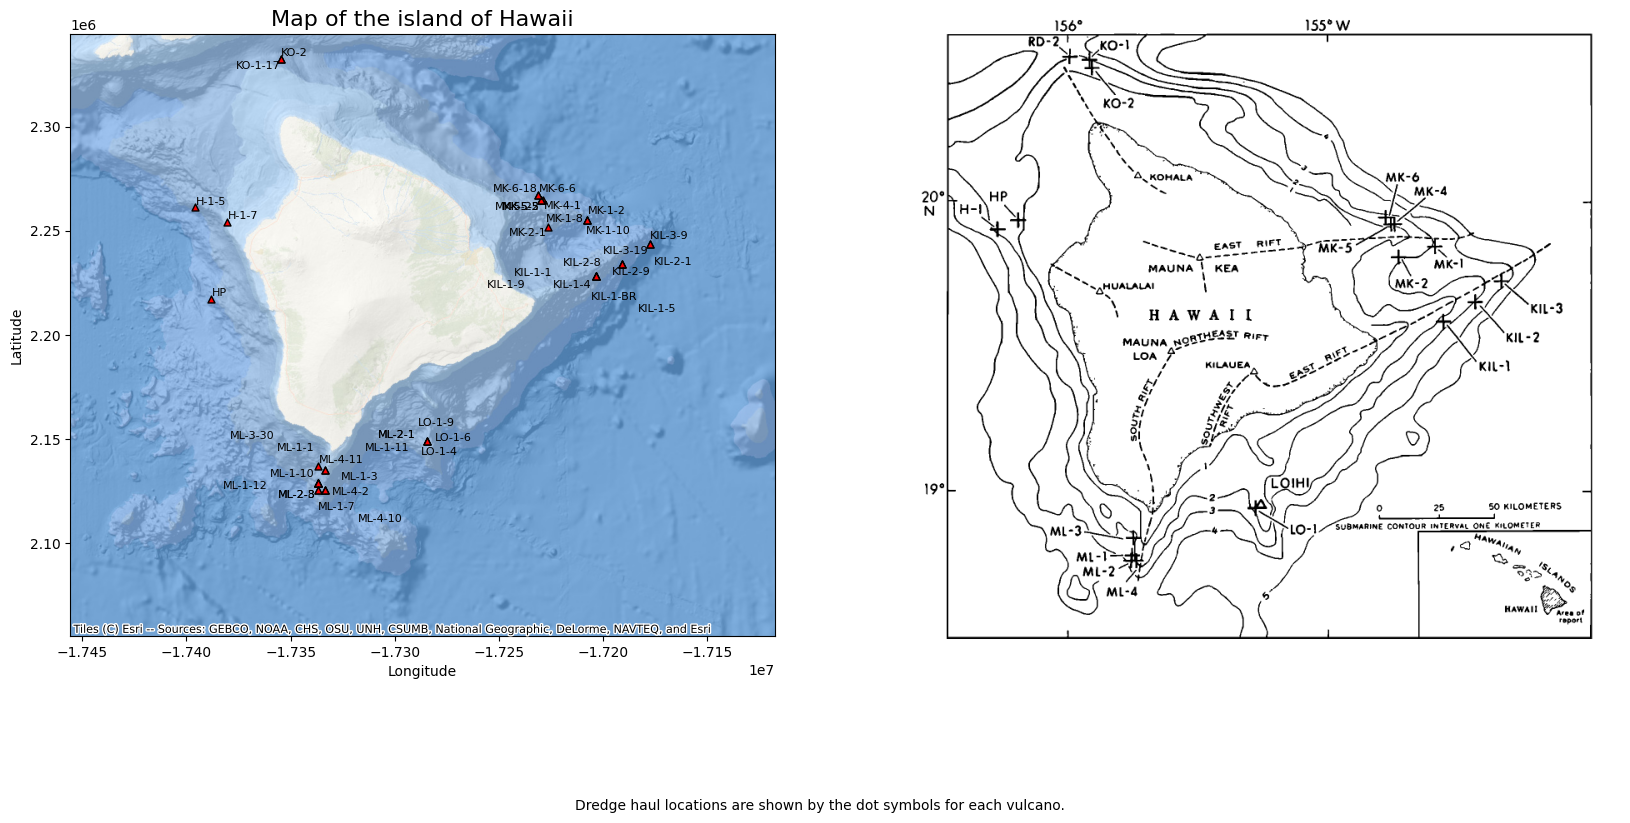

In [35]:
def plot_coordinates_on_map(final_df_sort):
    # Create a geopandas dataframe
    gdf = gpd.GeoDataFrame(
        final_df_sort,
        geometry=gpd.points_from_xy(final_df_sort.Longitude, final_df_sort.Latitude))
    gdf.crs = 'EPSG:4326'  # Set the initial CRS (Coordinate Reference System) to WGS84

    # Reproject the data to match the CRS used by contextily
    gdf_web_mercator = gdf.to_crs(epsg=3857)

    # Create the base map
    fig = plt.figure(figsize=(20, 10))  # adjust as needed
    gs = GridSpec(1, 2, width_ratios=[1, 1])

    # plot on first subplot
    ax1 = plt.subplot(gs[0])
    for _, row in gdf_web_mercator.iterrows():
        ax1.scatter(
            row['geometry'].x,
            row['geometry'].y,
            color='red',
            edgecolors='black',
            marker='^',
            s=25
        ) 

    ax1.set_xlim(gdf_web_mercator.total_bounds[0] - 60000, gdf_web_mercator.total_bounds[2] + 60000)
    ax1.set_ylim(gdf_web_mercator.total_bounds[1] - 70000, gdf_web_mercator.total_bounds[3] + 12000)
    ctx.add_basemap(ax1, source=ctx.providers.Esri.OceanBasemap, zoom='auto')
    ax1.set_title('Map of the island of Hawaii', fontsize=16)
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')

    texts = []
    for _, row in gdf_web_mercator.iterrows():
        texts.append(
            plt.text(
                row['geometry'].x,
                row['geometry'].y,
                str(row['SampleName']),
                fontsize=8,
                color='black',
                ha='center')
        )
    adjust_text(texts)

    description = "Dredge haul locations are shown by the dot symbols for each vulcano."
    plt.figtext(0.5, 0.02, description, ha='center', fontsize=10)

    # plot png image on second subplot
    ax2 = plt.subplot(gs[1])
    img = mpimg.imread('grafics/Hawaii_pub.png')  # specify the path to your png image
    ax2.imshow(img, cmap='gray')
    ax2.axis('off')  # to hide the axis

    # Save and show the map
    plt.savefig("plot_hawaii.png")
    plt.show()

# Plot coordinates on the map using the measurement_data DataFrame
plot_coordinates_on_map(final_df_sort)

[Back to Table of contects](#table)

***

#### <a name="plotfeotS"></a> Plot FeO* against S

<div style="text-align: justify; max-width: 850px">

This code section utilizes matplotlib and seaborn libraries to generate a scatter plot for 'FeO*' vs. 'S' values in the final_df DataFrame, while also marking certain data points with ellipses.

Firstly, a list of columns to be excluded from the plot and a list of markers and colors for the scatter plot are defined. These markers and colors are used to visually distinguish different groups of data in the plot.

In the next part, specific SampleIDs are chosen to be highlighted with ellipses. For each ellipse, initial parameters (center, width, height, and angle) are set to None or zero.

The code then sets the size of the plot figure and starts a loop through each row of the final_df DataFrame. Within the loop, each data point is plotted on the scatter plot according to its 'FEOT' and 'S' values. The marker style and color are selected based on the loop index.

For the rows where SampleID matches one of the defined sample IDs for ellipses, the script checks whether the corresponding ellipse parameters have been set. If not, they are set to specific values. Then, an ellipse is created with these parameters and added to the plot. Each ellipse is created using the matplotlib.patches.Ellipse function, and it is customized with different edge colors, line styles, and without a face color.

The code continues this process for all three ellipses, distinguishing each one with a different linestyle (dashed, dotted, and dashdot).

After all data points have been plotted and ellipses added, the plot is further customized with a legend, title, and axis labels. The axes' range is optionally restricted to enhance visibility of the plotted data points and ellipses.

Finally, the figure is saved as a PNG file and displayed in the notebook.

This script provides a visual exploration of the relationship between 'FeO*' and 'S' values in the final_df DataFrame, with additional emphasis on specific sample IDs represented by ellipses. This helps in visualizing and interpreting important characteristics or groupings within the dataset.

</div>

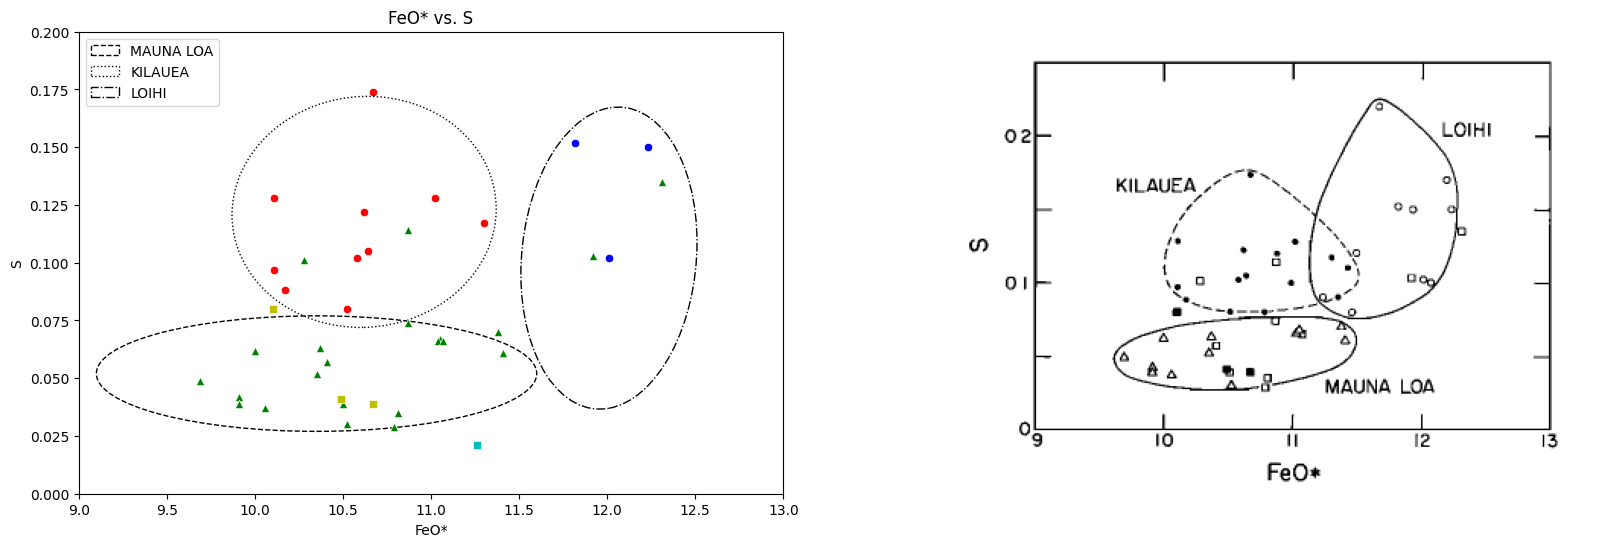

In [36]:
# List of columns to exclude
exclude_columns = ['Longitude', 'Latitude', 'Units', 'Item_Group', 'H2O', 'CH4', 'CL', 'CO1', 'CO2', 'D18O', 'DD']
# List of columns to include
included_columns = [col for col in final_df_sort.columns if col not in exclude_columns]

# Lists of markers and colors for scatter plot
markers = ['o'] * 3 + ['o'] * 10 + ['^'] * 23 + ['s'] * 3 + ['s'] * 3
colors = ['b'] * 3 + ['r'] * 10 + ['g'] * 23 + ['y'] * 3 + ['c'] * 3

# Sample IDs for ellipses
sampleids_ellipse1 = [511]
sampleids_ellipse2 = [482]
sampleids_ellipse3 = [476]

# Initialize variables for the ellipses outside of the loop
ellipse_center_1 = None
ellipse_width_1 = 0
ellipse_height_1 = 0
ellipse_angle_1 = 0

ellipse_center_2 = None
ellipse_width_2 = 0
ellipse_height_2 = 0
ellipse_angle_2 = 0

ellipse_center_3 = None
ellipse_width_3 = 0
ellipse_height_3 = 0
ellipse_angle_3 = 0

# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust the figure size as needed

# Loop through the rows of the final_df DataFrame
for i in range(len(final_df_sort)):
    # Plot the scatterplot on the first subplot
    sns.scatterplot(ax=axes[0], x=final_df_sort['FEOT'].iloc[i:i+1], y=final_df_sort['S'].iloc[i:i+1],
                    marker=markers[i], color=colors[i])

    # Get the sample ID for the current row
    sampleid = final_df_sort['SampleID'].iloc[i]

    # Add ellipses for specific sample IDs
    if sampleid in sampleids_ellipse1:
        if ellipse_center_1 is None:
            # Set the center, width, height, and angle for ellipse 1
            ellipse_center_1 = (final_df_sort['FEOT'].iloc[i], final_df_sort['S'].iloc[i])
            ellipse_width_1 = 2.5
            ellipse_height_1 = 0.05
            ellipse_angle_1 = 0

        # Create and add ellipse 1 to the plot
        ellipse_1 = Ellipse(ellipse_center_1, 
                            ellipse_width_1, 
                            ellipse_height_1, 
                            angle=ellipse_angle_1, 
                            edgecolor='black', 
                            facecolor='none', 
                            linestyle='dashed'
                            )
        axes[0].add_patch(ellipse_1)

    if sampleid in sampleids_ellipse2:
        if ellipse_center_2 is None:
            # Set the center, width, height, and angle for ellipse 2
            ellipse_center_2 = (final_df_sort['FEOT'].iloc[i], final_df_sort['S'].iloc[i])
            ellipse_width_2 = 1.5
            ellipse_height_2 = 0.1
            ellipse_angle_2 = 0.1

        # Create and add ellipse 2 to the plot
        ellipse_2 = Ellipse(ellipse_center_2, 
                            ellipse_width_2, 
                            ellipse_height_2, 
                            angle=ellipse_angle_2, 
                            edgecolor='black', 
                            facecolor='none', 
                            linestyle='dotted'
                            )
        axes[0].add_patch(ellipse_2)

    if sampleid in sampleids_ellipse3:
        if ellipse_center_3 is None:
            # Set the center, width, height, and angle for ellipse 3
            ellipse_center_3 = (final_df_sort['FEOT'].iloc[i], final_df_sort['S'].iloc[i])
            ellipse_width_3 = 1.0
            ellipse_height_3 = 0.13
            ellipse_angle_3 = 0.8

        # Create and add ellipse 3 to the plot
        ellipse_3 = Ellipse(ellipse_center_3, 
                            ellipse_width_3, 
                            ellipse_height_3, 
                            angle=ellipse_angle_3, 
                            edgecolor='black', 
                            facecolor='none', 
                            linestyle='dashdot'
                            )
        axes[0].add_patch(ellipse_3)

# Add legend, title, and axis labels to the first subplot
axes[0].legend(handles=[ellipse_1, ellipse_2, ellipse_3], labels=['MAUNA LOA', 'KILAUEA', 'LOIHI'], loc='upper left')
axes[0].set_title("FeO* vs. S")
axes[0].set_xlabel("FeO*")
axes[0].set_ylabel("S")

# Optionally, restrict the range of the x-axis and y-axis
axes[0].set_xlim(9, 13)
axes[0].set_ylim(0, 0.2)

# Load the image
img = mpimg.imread('grafics/S_vs_FeOT_pub.png')

# Display the image in the second subplot
axes[1].imshow(img, cmap='gray')
axes[1].axis('off')  # Optionally turn off the axis for the image subplot

# Save the plot as an image
plt.savefig('plot_FEOT_vs_S.png')

# Display the plot
plt.show()

[Back to Table of contects](#table)

***

#### <a name="plottas"></a> Plot the data in the TAS diagram

<div style="text-align: justify; max-width: 850px">

This code creates a scatter plot to visualize the relationship between the values of $SiO_2$ and $K_2O+Na_2O$ in a DataFrame named final_df.

First, a new column 'K2O+NA2O' is added to the final_df DataFrame, which represents the sum of the values in the $K_2O$ and $Na_2O$ columns for each row.

Next, lists of markers and colors are created to distinguish the individual data points in the scatter plot. These lists are created such that different groups of data points get different markers and colors.

Then, the figure size is set, and a scatter plot for each data point is created by iterating through the rows of final_df. Each data point is placed on the scatter plot according to its $SiO_2$ and $K_2O+Na_2O$ values. The marker and color for each point are selected based on the index in the loop.

Additionally, a line is added to the plot that separates the data points into two groups, labeled 'ALKALIC' and 'THOLEIITIC'. The line is drawn by defining two points specified by their x and y coordinates, and a line is drawn between these points.

Finally, a title and axis labels are added to the plot, and the range of the x and y axes is optionally restricted. The plot is then displayed.

</div>

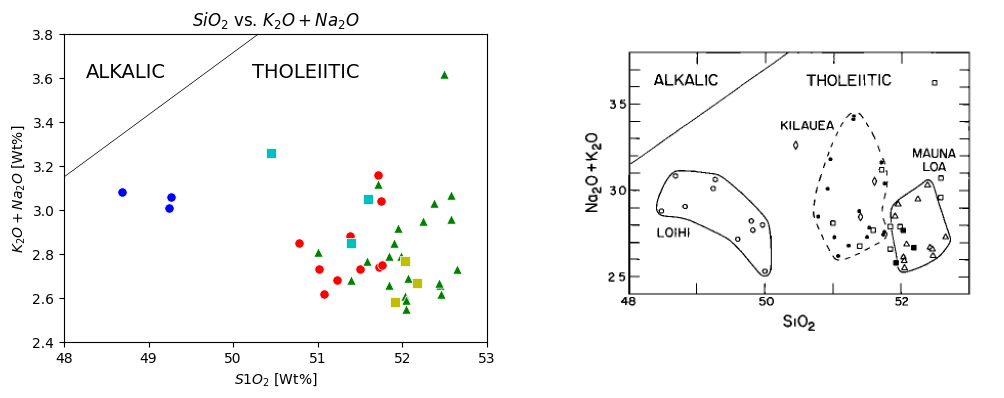

In [37]:
# Adding a new column 'K2O+NA2O' to the final_df DataFrame
final_df_sort['K2O+NA2O'] = final_df_sort['K2O'] + final_df_sort['NA2O']

# Creating a list of markers
markers = ['o'] * 3 + ['o'] * 10 + ['^'] * 23 + ['s'] * 3 + ['s'] * 3
# Creating a list of colors
colors = ['b'] * 3 + ['r'] * 10 + ['g'] * 23 + ['y'] * 3 + ['c'] * 3

# Set the figure size and create two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust the figure size as needed

# Plotting scatterplots for each row in final_df on the first subplot
for i in range(len(final_df_sort)):
    sns.scatterplot(ax=axes[0], x=final_df_sort['SIO2'].iloc[i:i+1], y=final_df_sort['K2O+NA2O'].iloc[i:i+1],
                    marker=markers[i], color=colors[i], s=45)

# Adding a line and text annotations to the first subplot
x_values = [48, 50.3]
y_values = [3.15, 3.8]
axes[0].plot(x_values, y_values, color='k', linewidth=0.5)
axes[0].text(49.2, 3.6, 'ALKALIC', ha='right', fontsize=14)
axes[0].text(51.5, 3.6, 'THOLEIITIC', ha='right', fontsize=14)

# Adding title and axis labels to the first subplot
axes[0].set_title("$SiO_2$ vs. $K_2O+Na_2O$")
axes[0].set_xlabel("$S1O_2$ [Wt%]")
axes[0].set_ylabel("$K_2O+Na_2O$ [Wt%]")

# Optionally, restricting the range of the axes
axes[0].set_xlim(48, 53)
axes[0].set_ylim(2.4, 3.8)

# Load the image
img = mpimg.imread('grafics/TAS_pub.png')

# Display the image in the second subplot
axes[1].imshow(img, cmap='gray')
axes[1].axis('off')  # Optionally turn off the axis for the image subplot

# Save the plot as an image
plt.savefig('plot_TAS.png')

# Display the plot
plt.show()

[Back to Table of contects](#table)

***

#### <a name="excursion"></a> **Excursion**: EarthChem API

<div style="text-align: justify; max-width: 850px">

<img src="https://earthchem.org/wp-content/uploads/2020/10/earthchem_full_logo_black.png" style="height:200px" align="left"/> <br><br><br><br><br><br><br><br><br><br>

The EarthChem database is a comprehensive resource for geochemical and petrological data. It provides access to a wide range of data, including elemental compositions, isotopic ratios, and rock classifications. To facilitate access to the data, EarthChem also provides an API. This API allows researchers to retrieve, analyze, and integrate data into their own applications. The EarthChem API provides flexible query capabilities and enables detailed exploration of the data. It promotes scientific discovery and collaboration in the geosciences.

First, the URL is defined through which the requests are to be sent to the EarthChem API. In this case it is "http://portal.earthchem.org/restsearchservice".

Then the parameters that will be used for the API request are defined. The DOI ("10.1029/JB094iB08p10525") is specified to be searched for. The search type ("rowdata"), output type ("json"), and default elements ("yes") are also specified.

The request to the API is sent using the requests.get() command, passing the URL and parameters. The result is stored in the response variable.

The response object (response) is converted to JSON format to extract the data. The response.json() function returns a Python object that contains the extracted data.

The extracted data is then converted into a Pandas DataFrame using pd.json_normalize() to obtain a tabular structure.

Finally, the DataFrame is saved to a CSV file named "EarthChem.csv" located in the "dataset" directory.

</div>

In [39]:
url = "http://portal.earthchem.org/restsearchservice"

params = {
    'doi': '10.1029/JB094iB08p10525',
    'searchtype': 'rowdata',
    'outputtype': 'json',
    'standarditems': 'yes'
}

response = requests.get(url, params=params)

data = response.json()
df = pd.json_normalize(data)

df.to_csv('dataset/EarthChem.csv')

<div style="text-align: justify; max-width: 850px">

With pd.read_csv() the CSV file is read and saved into a Pandas DataFrame named df.

Then df_cleaned is created by removing all columns that consist only of missing values. Here dropna() is used, where axis=1 indicates that columns should be removed, and how='all' indicates that a column is removed if it consists solely of missing values.

Finally, the cleaned DataFrame df_cleaned is output with print() to display the results.

</div>

In [1]:
df = pd.read_csv('dataset/EarthChem.csv')

df_cleaned = df.dropna(axis=1, how='all')

df_cleaned

NameError: name 'pd' is not defined

[Back to Table of contects](#table)

***

### <a name="refs"></a>References

<div style="text-align: justify; max-width: 850px">

[1] **Garcia, M. O., Muenow, D. W., Aggrey, K. E., and O'Neil, J. R. (1989)**, Major element, volatile, and stable isotope geochemistry of Hawaiian submarine tholeiitic   glasses, J. Geophys. Res., 94( B8), 10525– 10538, doi:10.1029/JB094iB08p10525. 

[2] **EarthChem Systems** (\`date +%Y\`): EarthChem Database. Interdisciplinary Earth Data Alliance (IEDA). [Link to database](https://www.earthchem.org/). Accessed \`date +"%d %B %Y"\`.

[3] **requests** - Python HTTP library for humans. [Online]. Available: https://requests.readthedocs.io

[4] **json** - This is part of Python's standard library. Python Software Foundation. Python Language Reference, version 3.x. Available at http://www.python.org

[5] **pandas** - Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010) [Online]. Available: https://pandas.pydata.org

[6] **geopandas** - GeoPandas developers. GeoPandas: Python tools for geographic data [Online]. Available: https://geopandas.org

[7] **seaborn** - Michael Waskom, Olga Botvinnik, Drew O’Kane, Paul Hobson, Joel Ostblom, Saulius Lukauskas, ... & Tom Augspurger. (2020, October 4). mwaskom/seaborn: v0.11.0 (Version v0.11.0). Zenodo. http://doi.org/10.5281/zenodo.4019147

[8] **matplotlib** - John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55

[9] **contextily** - Darribas, D., Arribas-Bel, D., Nshan, B., & van den Bosch, M. (2020). contextily: context geo-tiles in Python. Journal of Open Source Software, 5(55), 2302. https://doi.org/10.21105/joss.02302

[10] **adjustText** - Ilya Flyamer. (2016). adjustText: A small library for automatically adjusting text position in matplotlib plots to minimize overlaps. Zenodo. http://doi.org/10.5281/zenodo.4922517

[11] **ipywidgets** - Project Jupyter. (2017). ipywidgets: Interactive HTML widgets for Jupyter notebooks and the IPython kernel. Zenodo. https://doi.org/10.5281/zenodo.836874

[Back to Table of contects](#table)

</div>

***

### <a name="qrcode"></a>QR code for accessing this Jupyter notebook on Binder

<img src="https://raw.githubusercontent.com/tmwProjects/Georoc_jupyter/main/grafics/BINDER_JUPYTER_QR.png" style="height:610px" align="left"/> <br><br>

##### <a name="hint3"></a>Hint:
- In some cases, Binder may not work the first time it is started. Then simply restart the link again.

***

### <a name="follow"></a>Follow us

[Visit our Website](https://georoc.mpch-mainz.gwdg.de/georoc/)

<a id="follow-button" class="btn" title="Follow @DIGISgeo on Twitter" href="https://twitter.com/intent/follow?original_referer=https%3A%2F%2Fgeoroc.eu%2F&amp;ref_src=twsrc%5Etfw%7Ctwcamp%5Ebuttonembed%7Ctwterm%5Efollow%7Ctwgr%5EDIGISgeo&amp;region=follow_link&amp;screen_name=DIGISgeo"><i></i><span class="label" id="l">Follow <b>@DIGISgeo</b></span></a>


[Back to Table of contects](#table)

***